### Algorithm Pseudocode



#### Require
* $S$ -- a matrix in $\mathbb{R}^{d, N}$
  * denote $s_i$ as the $i'th$ column vector of $S$, and $s^j$ as the $j'th$ row vector of $S$.
* $agg$ -- an aggregation function (e.g. *mean*, *min*, *max*)

#### Ensure
* $w$ -- a weight vector in $\mathbb{R}{d}$.
  * $\sum_{i = 1}^d w[i] = 1$
  
**computeWeightRaw**($S$, $agg$):
  1. for $i$ from $1$ to $d$:
    * $w_i := agg(S^i)$ where $S^i$ is the $i'th$ row vector of $S$
  2. for $i$ from $1$ to $d$:
    * $w_i = w_i / \sum_{j = 1}^d w_i$
  3. return w

#### Require
* $S$ -- a matrix in $\mathbb{R}^{d, N}$
  * denote $s_i$ as the $i'th$ column vector of $S$, and $s^j$ as the $j'th$ row vector of $S$.
* $agg$ -- an aggregation function (e.g. *mean*, *min*, *max*)

#### Ensure
* $w$ -- a weight vector in $\mathbb{R}{d}$.
  * $\sum_{i = 1}^d w[i] = 1$
  
#### Require
* $D$ -- an indexed set of $N$ Multivariate Time Series (MTS) objects. Each object has the same dimension $d$, but may have a different number of timesteps.
  * e.g. $D[i] \in \mathbb{R}^{n_i, d}, i \in \{1, 2, ..., N \}$
* $agg$ -- an aggregation function (e.g. *mean*, *min*, *max*)

#### Ensure
* $\delta_{Eros}: (D, D) \rightarrow [0, 1]$, a function taking as input two objects in $D$ and returning a number in the range $[0, 1]$.

**meanCenter(M)** - center each column vector of $M$ by its mean.

**columnNormalize(M)** - divide each column vector of $M$ by its sum

**makeFunction**($D$, $agg$):
  1. $N := len(D)$
  2. for $i$ from $1$ to $N$:
    * $D[i] = meanCenter(D[i])$
    * $A, b, C := svd(D[i])$
    * $R_i := C$
    * $s_i := b$
  3. $S := (s_1, s_2, \ldots, s_N)$
  4. $S = columnNormalize(S)$
  5. $w := computeWeightRaw(S, agg)$
  6. define $\delta_{Eros}(D[i], D[i]) = \sum_{k = 1}^d w_i \| (R_i)_k^T (R_j)_k \|$ where $A_k$ is the $k'th$ column vector of matrix $A$.

### Expect to work
Considering each MTS to be a point cloud in $\mathbb{R}^d$, we expect this algorithm to work well when the orientations of the point clouds of similar (within cluster) $MTS$ are aligned, and we expect this algorithm not to work well when this is not the case.

We will generate time series of dimension $d$ with $T$ time steps from a toy stochastic process which we believe to have these properties:
1. Sample $\Theta \sim \mathcal{N}^d(\vec{0}, s * \mathcal{I}_d)$
2. Transform $\tilde{\Theta} = e^{\Theta} / \| \Theta\|$
3. Sample $x_0 \sim \mathcal{N}^d(\vec{0}, \mathcal{I}_d \tilde{\Theta}) \sqrt{T}$
4. For $i$ from $1$ to $T$
  * Sample $c \sim \mathcal{N}^d(\vec{0}, \mathcal{I}_d \tilde{\Theta})$
  * $x_i = x_{i - 1} + c$
  
We expect time series sampled in this way to be different from one another (e.g. high distance). However, if we sampled $k$ time series by sampling one time series of length $kT$ then splitting the larger time series into $k$ time series of length $T$, we would expect each of the $k$ time series to be close to one another (e.g. have a low distance).

### Experiments and expectations

1. First, we sample 20 time series of length $T$ and compute the pairwise distance matrix. We when artificially impose groups on the time series, e.g. 1-5 are group 1, 6-10 are group 2, ect. We expect intra and inter group distances to be similar
2. Next, we sample 20 time series of length $T$ using the second method, e.g. sampling 4 time series of length $5T$ then splitting each larger time series into $5$ samples of length $T$. We expect intra group distances to be smaller than inter group distances.
3. Finally, we test this on real data. Given EEG scans from one subject on $k$ paradigms (meaning $k$ distinct cognitive tasks being completed during the time of the corresponding scan), we split each scan into $10$ equal chunks, so that we have $10k$ scans. Computing all pairwise distances, we expect intra paradigm distances to be smaller than inter paradigm distances, if the data are similar to the model above (e.g. activations in the brain are a stochastic process, and each paradigm has a distinct parameterization of its stochastic process such that the orientation of point clouds of two time series from the same parameterized stochastic process are similar).

### Toy data experiment (experiments 1 and 2)

In [1]:
import os
import pickle as pkl
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
print(sys.version)
sys.path.append("../../../")
import lemur.distance.functions
import lemur.utils.io
import lemur.utils.matrix

3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


##### Simulated data

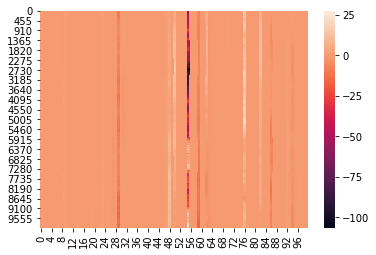

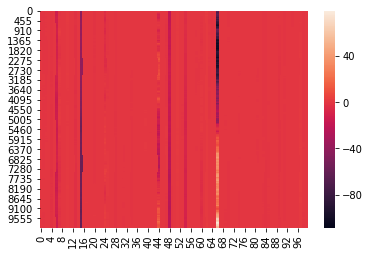

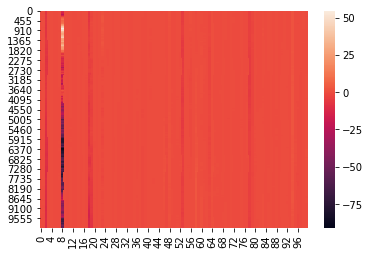

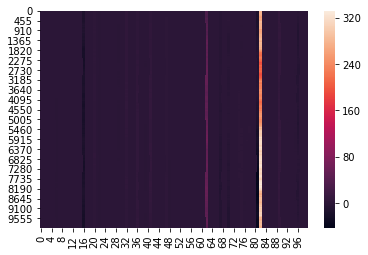

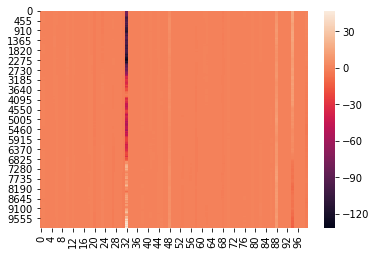

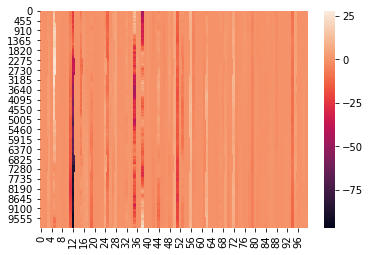

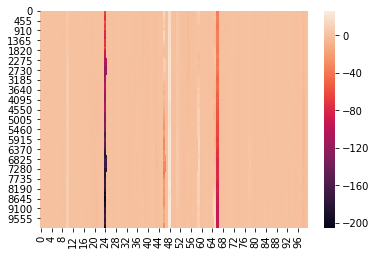

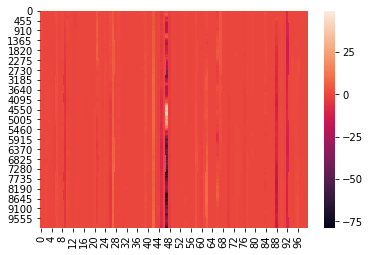

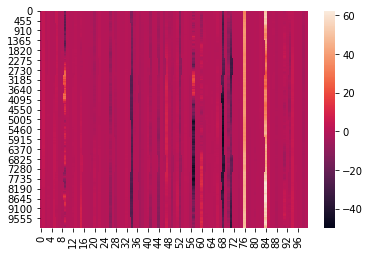

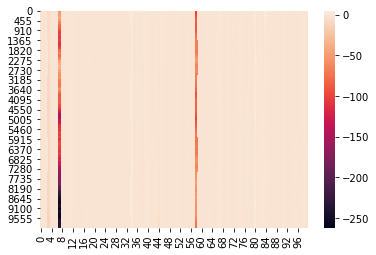

In [2]:
for i in range(10):    
    test = lemur.utils.matrix.generateRandomTimeSeries(100, 10000, strength=3)
    sns.heatmap(test)
    plt.show()

In [3]:
def inOutPlot(inVals, outVals):
    sns.distplot(inVals, kde=False, rug=True, label="intra group")
    sns.distplot(outVals, kde=False, rug=True, label="inter group")
    plt.xlabel("distance")
    plt.ylabel("frequency")
    plt.legend()
    plt.show()
    print("intra mean:", np.mean(inVals))
    print("inter mean:", np.mean(outVals))

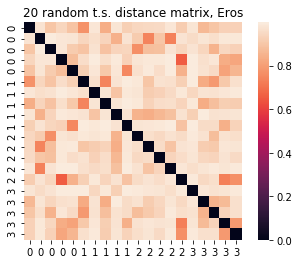

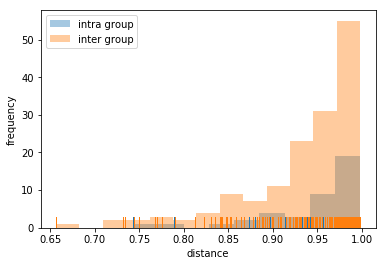

intra mean: 0.94580168458
inter mean: 0.934112042128


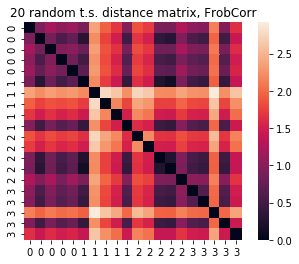

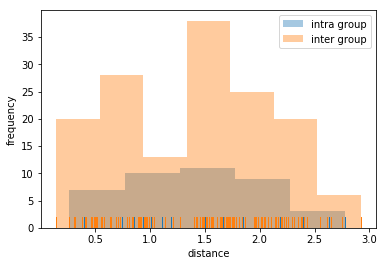

intra mean: 1.42581016836
inter mean: 1.41392728172


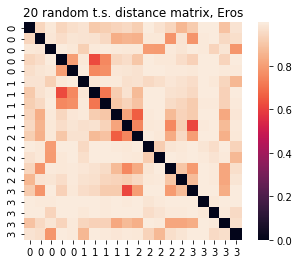

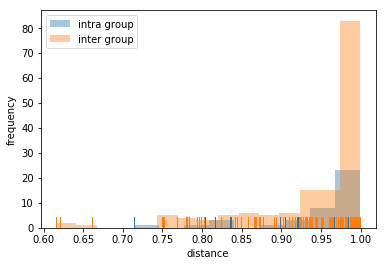

intra mean: 0.951635647204
inter mean: 0.941343174805


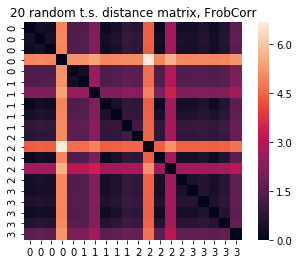

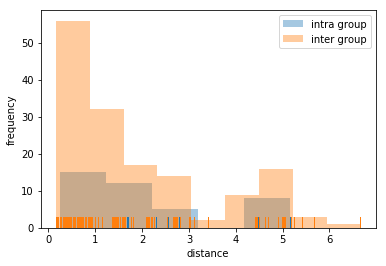

intra mean: 2.00155349594
inter mean: 1.95556184708


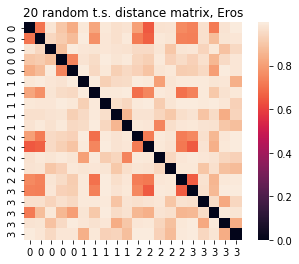

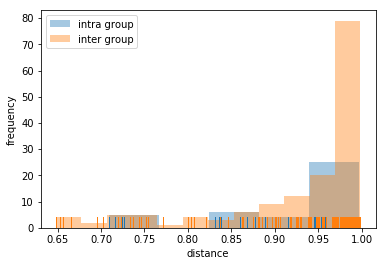

intra mean: 0.919559843291
inter mean: 0.929346520312


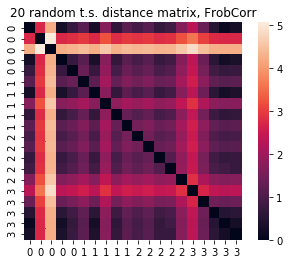

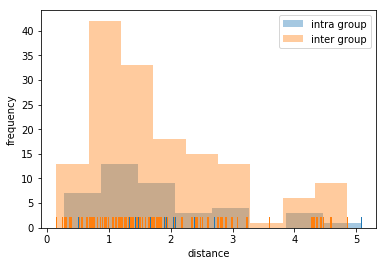

intra mean: 1.84357090028
inter mean: 1.82257893523


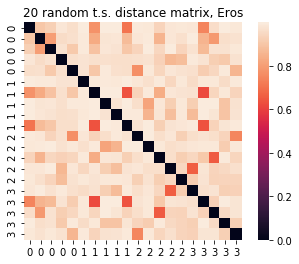

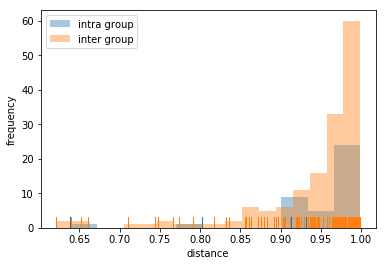

intra mean: 0.953785962519
inter mean: 0.941573499223


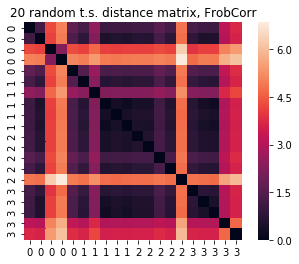

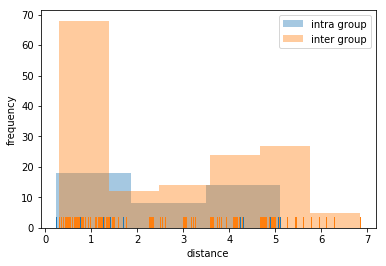

intra mean: 2.46151754543
inter mean: 2.54725044215


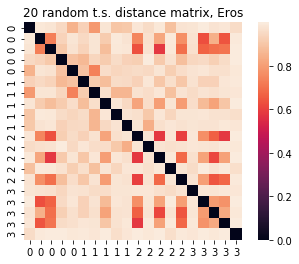

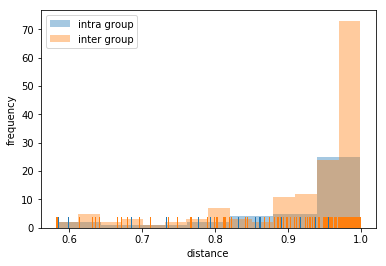

intra mean: 0.914443180305
inter mean: 0.919150156305


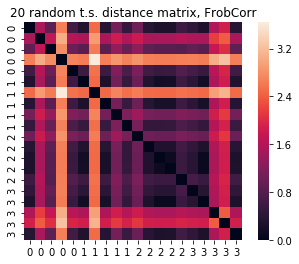

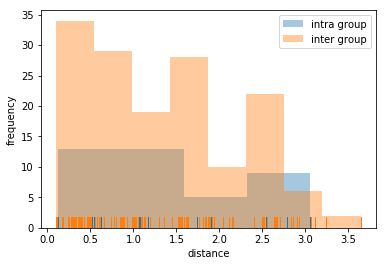

intra mean: 1.3489411255
inter mean: 1.33403158102


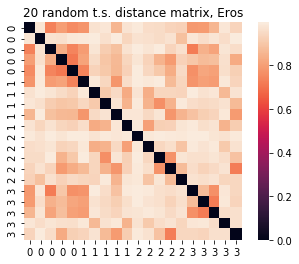

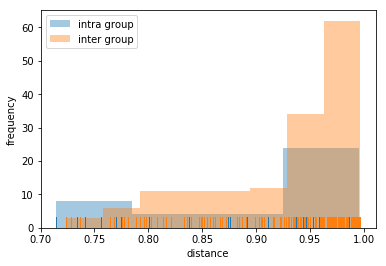

intra mean: 0.904506167495
inter mean: 0.924064389648


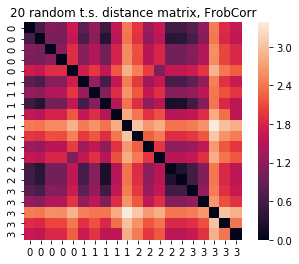

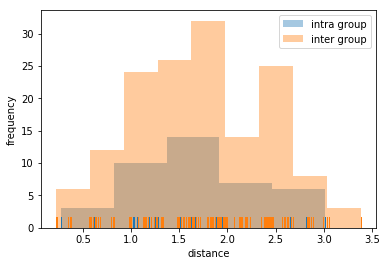

intra mean: 1.74786297954
inter mean: 1.72925677918


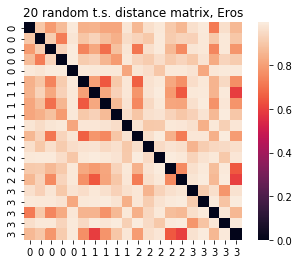

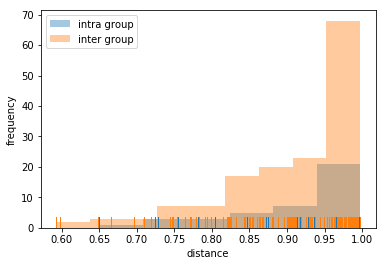

intra mean: 0.913112326464
inter mean: 0.908137873563


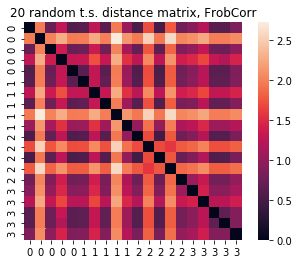

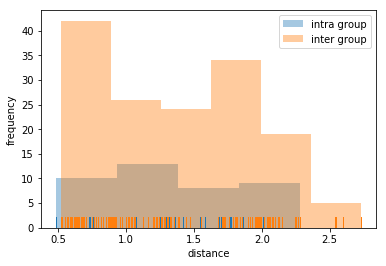

intra mean: 1.36540832762
inter mean: 1.3677007246


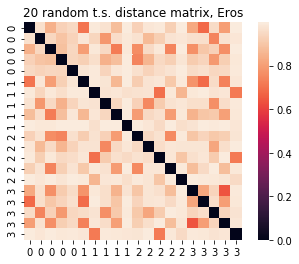

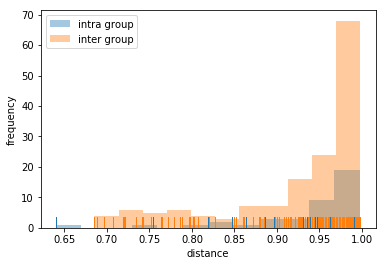

intra mean: 0.936666116942
inter mean: 0.925086682689


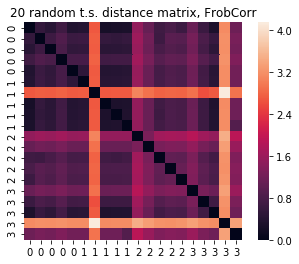

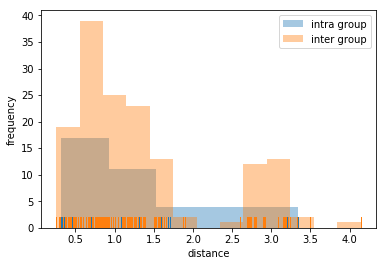

intra mean: 1.3274242214
inter mean: 1.35078567544


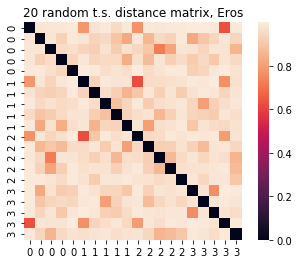

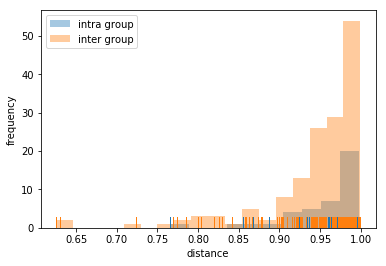

intra mean: 0.955663750042
inter mean: 0.943622960987


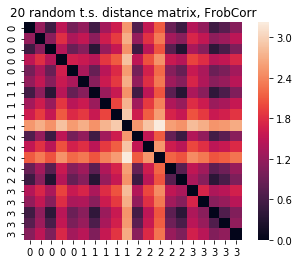

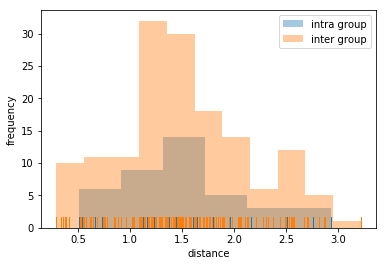

intra mean: 1.53012512148
inter mean: 1.51448047016


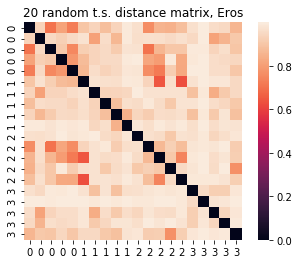

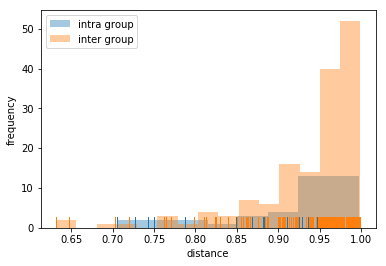

intra mean: 0.915986704945
inter mean: 0.938200163039


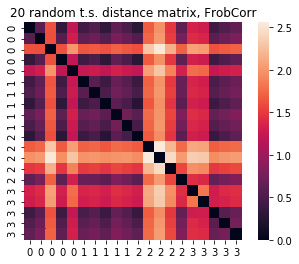

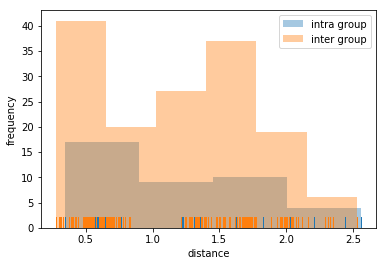

intra mean: 1.21204484835
inter mean: 1.2234255136


In [4]:
for _ in range(10):
    n_random = 20
    random_dataset = []
    for i in range(n_random):
        rts = lemur.utils.matrix.generateRandomTimeSeries(111, 10000, strength=3)
        random_dataset.append(rts)
    labels = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]
    EM = lemur.distance.functions.ErosMetric(random_dataset, np.mean)
    Fr = lemur.distance.functions.FroMetric(random_dataset)
    EM_mat = lemur.distance.functions.getDistMat(EM)
    Fr_mat = lemur.distance.functions.getDistMat(Fr)
    axislabels = lemur.distance.functions.getLabels(labels, EM.N)
    EM_in, EM_out = lemur.distance.functions.distMatInnerOuter(EM_mat, labels)
    Fr_in, Fr_out = lemur.distance.functions.distMatInnerOuter(Fr_mat, labels)
    sns.heatmap(EM_mat, 
                square=True,
                xticklabels=axislabels,
                yticklabels=axislabels)
    plt.title(str(n_random) + " random t.s. distance matrix, Eros")
    plt.show()

    inOutPlot(EM_in, EM_out)

    sns.heatmap(Fr_mat,
                square=True,
                xticklabels=axislabels,
                yticklabels=axislabels)
    plt.title(str(n_random) + " random t.s. distance matrix, FrobCorr")
    plt.show()

    inOutPlot(Fr_in, Fr_out)

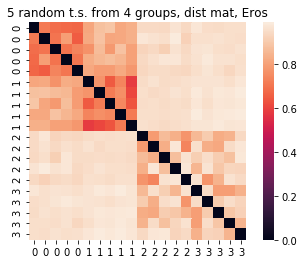

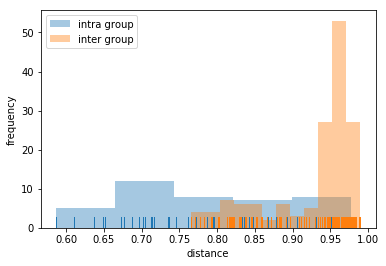

intra mean: 0.785479380337
inter mean: 0.929426893906


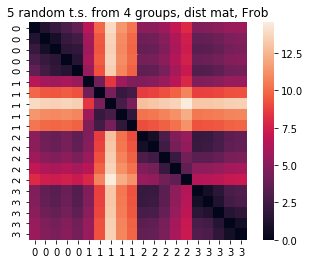

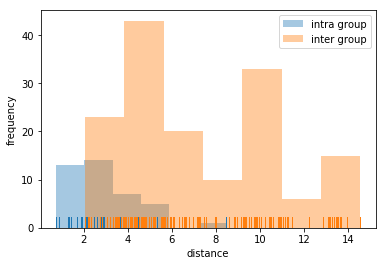

intra mean: 2.92852152588
inter mean: 7.28572847966


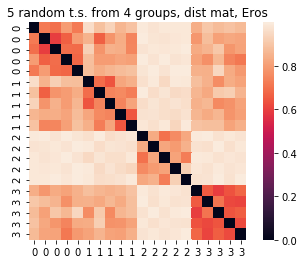

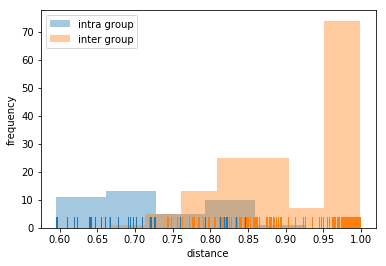

intra mean: 0.724334597347
inter mean: 0.910210586804


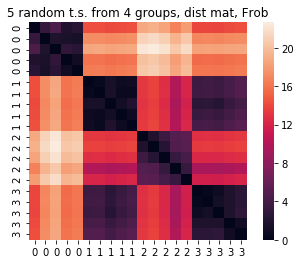

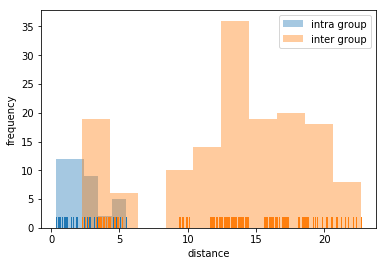

intra mean: 2.22558144918
inter mean: 13.5088050203


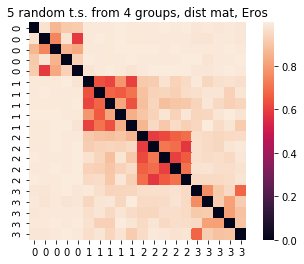

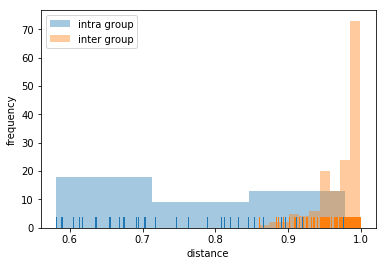

intra mean: 0.765359666412
inter mean: 0.972190466176


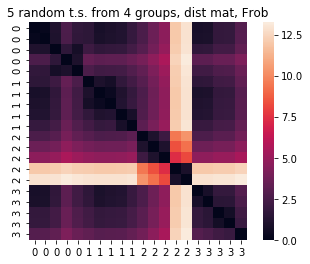

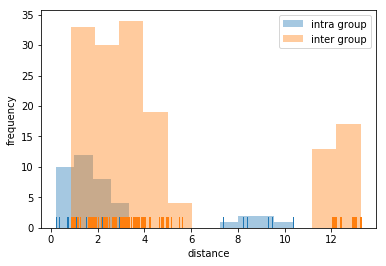

intra mean: 2.5931258564
inter mean: 4.77988035122


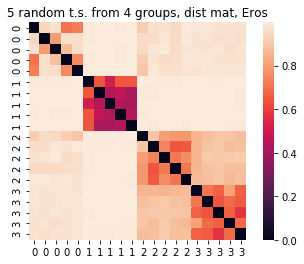

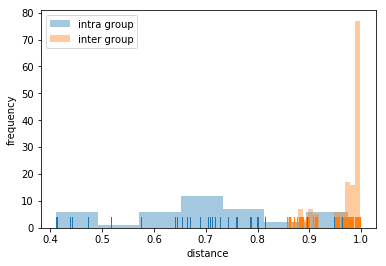

intra mean: 0.700463262794
inter mean: 0.968921124014


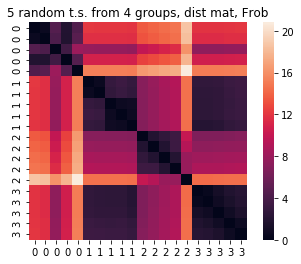

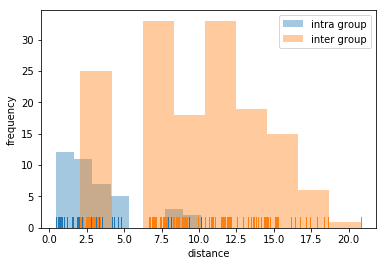

intra mean: 3.06701730663
inter mean: 9.82898233199


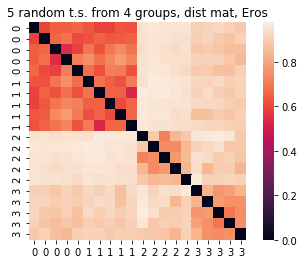

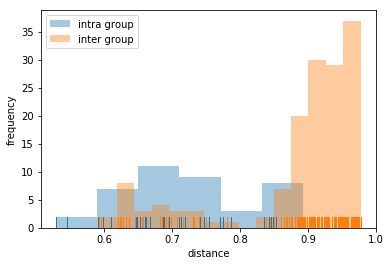

intra mean: 0.716501643381
inter mean: 0.883501967659


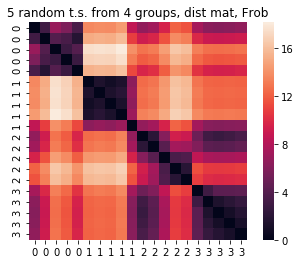

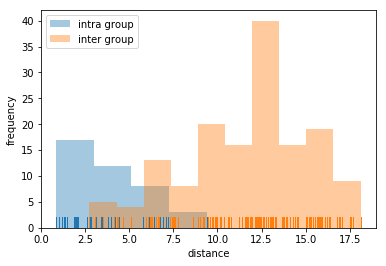

intra mean: 3.84385442768
inter mean: 11.6032978545


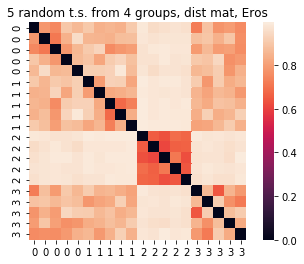

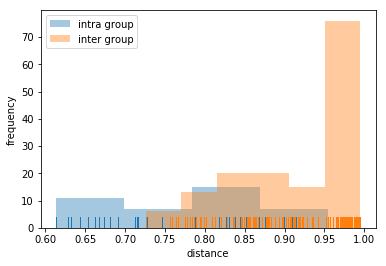

intra mean: 0.782165868134
inter mean: 0.916934382834


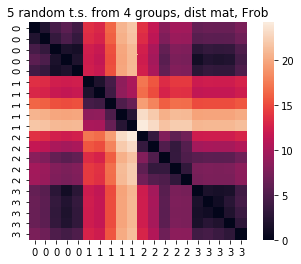

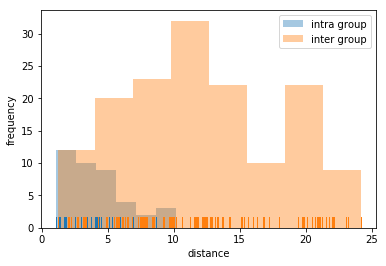

intra mean: 4.25509701045
inter mean: 12.1985021514


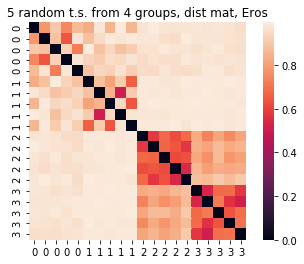

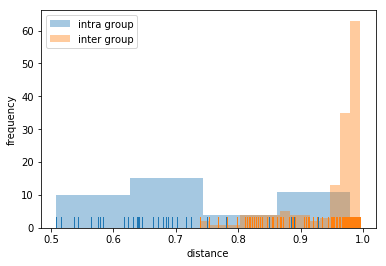

intra mean: 0.728214234546
inter mean: 0.947908300387


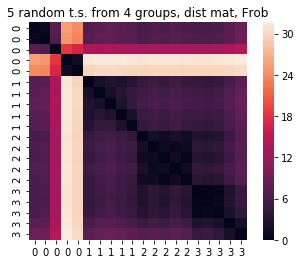

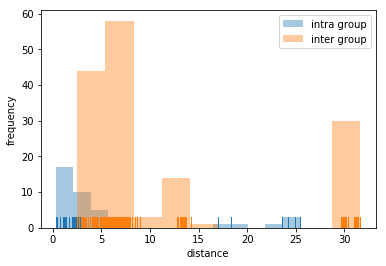

intra mean: 5.41323267393
inter mean: 11.4411931138


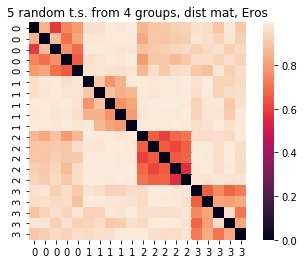

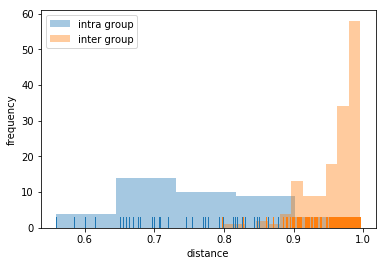

intra mean: 0.754827742785
inter mean: 0.958339302297


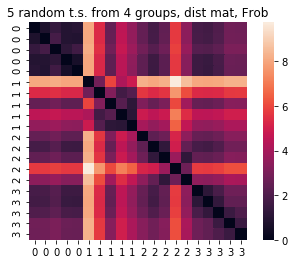

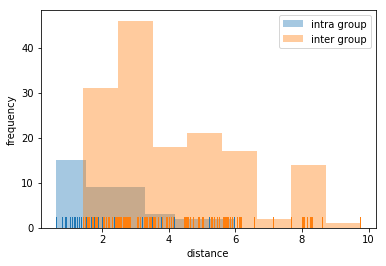

intra mean: 2.26340472499
inter mean: 4.07335417693


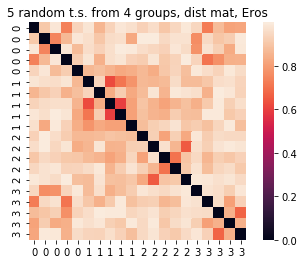

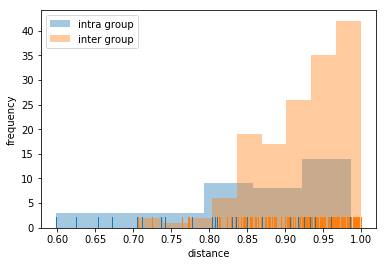

intra mean: 0.85486558232
inter mean: 0.922815064701


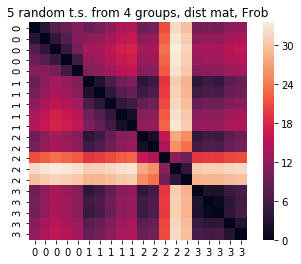

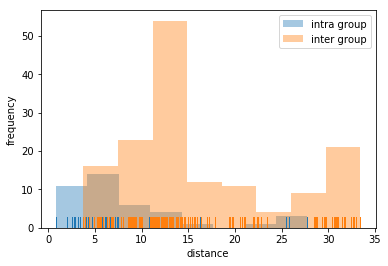

intra mean: 8.43523306762
inter mean: 16.2194829521


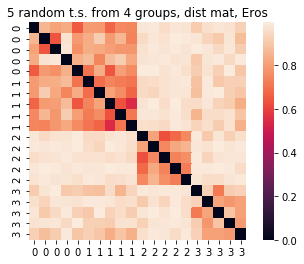

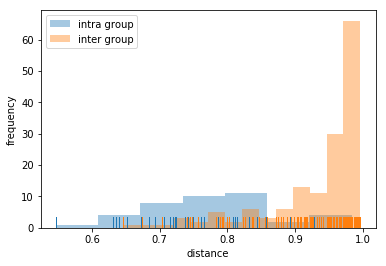

intra mean: 0.777073109846
inter mean: 0.93393336096


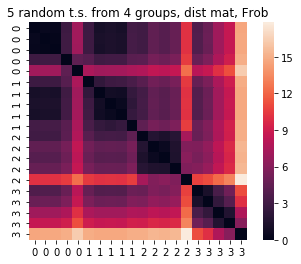

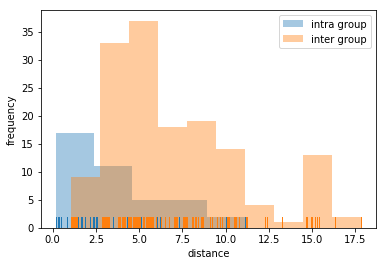

intra mean: 3.56442138428
inter mean: 6.92752174934


In [5]:
for _ in range(10):
    n_random = 5
    n_groups = 4
    groups = []
    for i in range(n_groups):
        rts = lemur.utils.matrix.generateRandomTimeSeries(
            111, n_random * 10000, strength=3)
        groups.append(rts)
    labels = []
    for i in range(n_groups):
        labels.extend([i] * n_random)
    random_dataset = []
    for g in groups:
        chunks = lemur.utils.matrix.divideMatrixIntoChunks(g, n_random)
        random_dataset.extend(chunks)
    EM = lemur.distance.functions.ErosMetric(random_dataset, np.mean)
    Fr = lemur.distance.functions.FroMetric(random_dataset)
    EM_mat = lemur.distance.functions.getDistMat(EM)
    Fr_mat = lemur.distance.functions.getDistMat(Fr)
    EM_in, EM_out = lemur.distance.functions.distMatInnerOuter(EM_mat, labels)
    Fr_in, Fr_out = lemur.distance.functions.distMatInnerOuter(Fr_mat, labels)
    axislabels = lemur.distance.functions.getLabels(labels, EM.N)

    sns.heatmap(EM_mat,
                square=True,
                xticklabels=axislabels,
                yticklabels=axislabels)
    title = "%d random t.s. from %d groups, dist mat, Eros" % (n_random, n_groups)
    plt.title(title)
    plt.show()
    inOutPlot(EM_in, EM_out)

    sns.heatmap(Fr_mat,
                square=True,
                xticklabels=axislabels,
                yticklabels=axislabels)
    title = "%d random t.s. from %d groups, dist mat, Frob" % (n_random, n_groups)
    plt.title(title)
    plt.show()

    inOutPlot(Fr_in, Fr_out)

In [18]:
subject_id = "NDARFZ296UNG"
paradigms = ["RestingState",
             "Video1",
             #"Video2",
             "Video3",
             "vis_learn",
             "WISC_ProcSpeed"
            ]

In [19]:
datas = map(lambda x: lemur.utils.io.getData(*x),
            zip([subject_id] * len(paradigms), paradigms))
datas = zip(list(datas), paradigms)
filtered_datas= filter(lambda x: x[0] is not None, datas)
datas, labels = zip(*filtered_datas)
mc_datas = list(map(lambda x: x - np.mean(x, axis=0), datas))

In [20]:
dataset = []
for d in mc_datas:
    dataset.extend(lemur.utils.matrix.divideMatrixIntoChunks(d, 10))
full_labels = []
for l in labels:
    full_labels.extend([l] * 10)

In [21]:
EM = lemur.distance.functions.ErosMetric(dataset, np.mean)
Fr = lemur.distance.functions.FroMetric(dataset)
EM_mat = lemur.distance.functions.getDistMat(EM)
Fr_mat = lemur.distance.functions.getDistMat(Fr)
axislabels = lemur.distance.functions.getLabels(labels, EM.N)

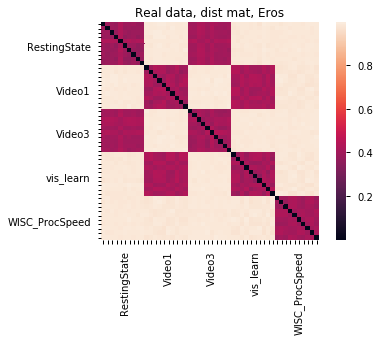

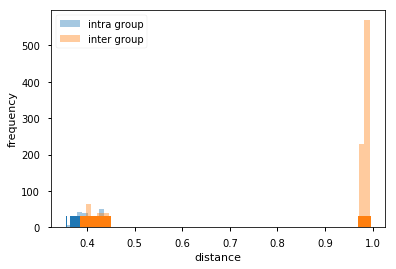

intra mean: 0.405499282385
inter mean: 0.870343669915


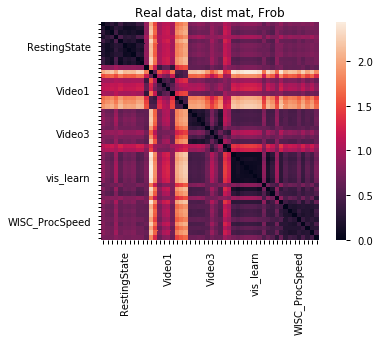

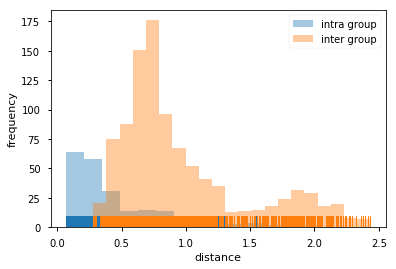

intra mean: 0.456899315472
inter mean: 0.972994315988


In [22]:
#import matplotlib
#matplotlib.rcParams['figure.figsize'] = (5, 5)
EM_in, EM_out = lemur.distance.functions.distMatInnerOuter(EM_mat, full_labels)
Fr_in, Fr_out = lemur.distance.functions.distMatInnerOuter(Fr_mat, full_labels)
axislabels = lemur.distance.functions.getLabels(labels, EM.N)
sns.set_context("notebook")
sns.heatmap(EM_mat, 
            square=True,
            xticklabels=axislabels,
            yticklabels=axislabels)
title = "Real data, dist mat, Eros"
plt.title(title)
plt.show()

inOutPlot(EM_in, EM_out)

sns.heatmap(Fr_mat,
            square=True,
            xticklabels=axislabels,
            yticklabels=axislabels)
title = "Real data, dist mat, Frob"
plt.title(title)
plt.show()

inOutPlot(Fr_in, Fr_out)

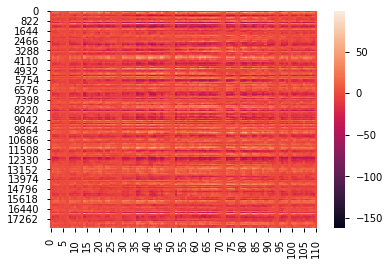

In [23]:
sns.heatmap(dataset[0])
plt.show()

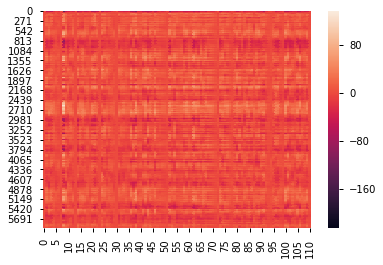

In [24]:
sns.heatmap(dataset[10])
plt.show()

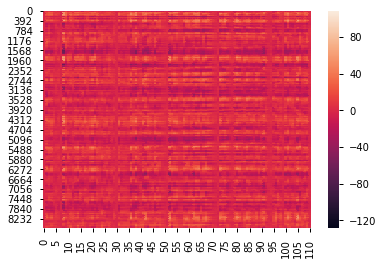

In [25]:
sns.heatmap(dataset[20])
plt.show()

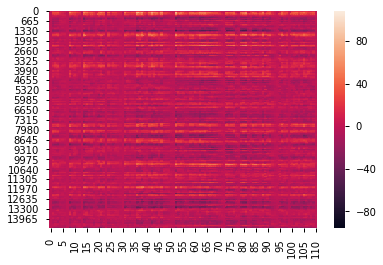

In [26]:
sns.heatmap(dataset[30])
plt.show()

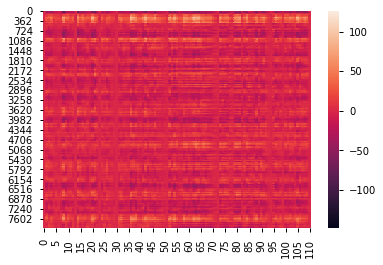

In [27]:
sns.heatmap(dataset[40])
plt.show()

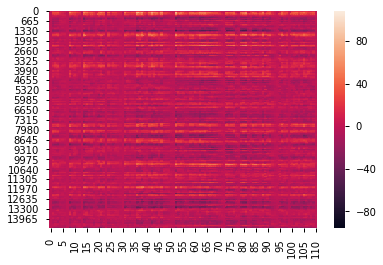

In [16]:
sns.heatmap(dataset[50])
plt.show()